What still needs to be done

Choose the best model (may not be the last one)

Initialize the DATA

In [87]:


from sklearn.model_selection import train_test_split
from sociophysicsDataHandler import SociophysicsDataHandler
import pandas as pd
import matplotlib.pyplot as pl

student_config = True

file_target = 'asdz/platform2.2/20200428/ASDZ_Perron2.2_2020042815_trajectorie.parquet' 

if student_config:
    dh = SociophysicsDataHandler()
    dh.fetch_prorail_data_from_path(file_target)
else:
    webdav_basepath='/Crowdflow (Projectfolder)/ProRail_USE_LL_data'
    dh = SociophysicsDataHandler(basepath=webdav_basepath)
    
    dh.fetch_prorail_data_from_path(file_target)
                           # ,basepath=webdav_basepath)

print('The available files are the following:')
dh.list_files("econophysics/reddit/")
for path in dh.filelist['path']:
    print(path)

targetPosts = True
stock = 'GME'

if targetPosts:
    filename = 'submissions_wallstreetbets_' + stock + '_start20200901_end20210706.json'
    if stock == 'GME':
        filename = 'submissions_wallstreetbets_GME_start20200901_end20210624.json'
else:
    filename = 'comments_' + stock + '.tar.gz'
    
dh.fetch_econophysics_data_from_path("econophysics/reddit/" + filename)
df = dh.df
# print one of the entries (in this case, the fifth):
df

for col in df.columns:
    print(col)

pd.set_option('display.max_columns', None)
df





trying to fetch: /storage/surfsara/ProRail_USE_LL_data/asdz/platform2.2/20200428/ASDZ_Perron2.2_2020042815_trajectorie.parquet
data fetched. Accessible as <this-object>.df
The available files are the following:
targeting path /storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/
Files listed. Accessible as <this-object>.filelist
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_AAPL.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_AMC.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_BBBY.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_FIZZ.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_GME.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_LGND.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_NOKIA.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_VIAC.tar.gz
/storage/surfsara/ProRail_USE_LL_

,id,all_awardings,author,author_fullname,created_utc,full_link,gildings,id.1,link_flair_css_class,link_flair_text,num_comments,num_crossposts,over_18,permalink,pinned,retrieved_on,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,total_awards_received,upvote_ratio,url,created,removed_by_category
0,o72ekv,[],Siphen_,t2_a0s1xfzf,1624546147,https://www.reddit.com/r/wallstreetbets/commen...,{},o72ekv,dd,DD,0,0,False,/r/wallstreetbets/comments/o72ekv/citadel_capi...,False,1624546158,1,If you find where they are hiding taking profi...,wallstreetbets,t5_2th52,10584237,Citadel Capital Replenishment,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1624538947,None
1,o72axq,[],Obvious-Amoeba-7158,t2_5kecmdlv,1624545829,https://www.reddit.com/r/wallstreetbets/commen...,{},o72axq,meme,Meme,1,0,False,/r/wallstreetbets/comments/o72axq/a_bird_took_...,False,1624545840,1,None,wallstreetbets,t5_2th52,10584217,A bird took a shit on my right shoulder. That ...,0,1.0,https://i.redd.it/kz3w2tqa78771.jpg,1624538629,moderator
2,o728za,[],Obvious-Amoeba-7158,t2_5kecmdlv,1624545659,https://www.reddit.com/r/wallstreetbets/commen...,{},o728za,news,News,1,0,False,/r/wallstreetbets/comments/o728za/a_bird_took_...,False,1624545671,1,None,wallstreetbets,t5_2th52,10584198,A bird took a shit on my right shoulder. That ...,0,1.0,https://i.redd.it/8mfoeejs68771.jpg,1624538459,moderator
3,o7284r,[],QuantitativEasing,t2_51vqmztv,1624545587,https://www.reddit.com/r/wallstreetbets/commen...,{},o7284r,yolo,YOLO,0,0,False,/r/wallstreetbets/comments/o7284r/been_with_gm...,False,1624545598,1,None,wallstreetbets,t5_2th52,10584191,Been with GME since $6,0,1.0,https://www.reddit.com/gallery/o7284r,1624538387,None
4,o723cs,[],Shlome_Mendlovits,t2_auf64xr4,1624545165,https://www.reddit.com/r/wallstreetbets/commen...,{},o723cs,dd,DD,0,0,False,/r/wallstreetbets/comments/o723cs/pubm_stock_i...,False,1624545177,1,"$PUBM STOCK IS 55% SHORTED, it is the MOST SHO...",wallstreetbets,t5_2th52,10584165,"$PUBM STOCK IS 55% SHORTED, it is the MOST SHO...",0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1624537965,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175412,ikrq8w,[],DeepFuckingValue,t2_49l8qytq,1598990735,https://www.reddit.com/r/wallstreetbets/commen...,{},ikrq8w,yolo,YOLO,93,0,False,/r/wallstreetbets/comments/ikrq8w/gme_yolo_mon...,False,1598990746,1,None,wallstreetbets,t5_2th52,1452992,GME YOLO month-start update — Sep 1 2020,0,1.0,https://i.redd.it/r47cc12lelk51.png,1598983535,None
175413,ikpgw9,[],airdoon,t2_10emmm,1598983707,https://www.reddit.com/r/wallstreetbets/commen...,{},ikpgw9,question,Discussion,41,0,False,/r/wallstreetbets/comments/ikpgw9/gme_short_sq...,False,1598983717,1,This is for all of you who think GME is the ne...,wallstreetbets,t5_2th52,1452670,GME short squeeze,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598976507,None
175414,ikp9ie,[],cyanlce,t2_zaweod7,1598983100,https://www.reddit.com/r/wallstreetbets/commen...,{},ikp9ie,question,Discussion,0,0,False,/r/wallstreetbets/comments/ikp9ie/gme_short_sq...,False,1598983111,1,[removed],wallstreetbets,t5_2th52,1452638,$GME short squeeze to the moon,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598975900,moderator
175415,ikeagj,[],King_Tendie_69,t2_5wcvwhh8,1598936908,https://www.reddit.com/r/wallstreetbets/commen...,{},ikeagj,question,Discussion,1,0,False,/r/wallstreetbets/comments/ikeagj/gme_who_is_w...,False,1598936918,1,[https://www.marketwatch.com/investing/stock/g...,wallstreetbets,t5_2th52,1451373,GME: Who is wielding adamantium gauntlets?,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598929708,None


In [88]:
stockname = ['AAPL', 'AMC', 'BBBY', 'FIZZ', 'GME', 'LGND', 'NOKIA', 'VIAC']
stock_post = {}
for stock in stockname:
    if stock == 'GME':
        filename = 'submissions_wallstreetbets_GME_start20200901_end20210624.json'
        dh.fetch_econophysics_data_from_path(f'econophysics/reddit/submissions_wallstreetbets_{stock}_start20200901_end20210624.json')
        stock_post[f'{stock}_post'] = dh.df
    else:
        dh.fetch_econophysics_data_from_path(f'econophysics/reddit/submissions_wallstreetbets_{stock}_start20200901_end20210706.json')
        stock_post[f'{stock}_post'] = dh.df

stock_post['GME_post']

trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_wallstreetbets_AAPL_start20200901_end20210706.json
data fetched. Accessible as <this-object>.df
trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_wallstreetbets_AMC_start20200901_end20210706.json
data fetched. Accessible as <this-object>.df
trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_wallstreetbets_BBBY_start20200901_end20210706.json
data fetched. Accessible as <this-object>.df
trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_wallstreetbets_FIZZ_start20200901_end20210706.json
data fetched. Accessible as <this-object>.df
trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_wallstreetbets_GME_start20200901_end20210624.json
data fetched. Accessible as <this-object>.df
trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/reddit/submissions_

,id,all_awardings,author,author_fullname,created_utc,full_link,gildings,id.1,link_flair_css_class,link_flair_text,num_comments,num_crossposts,over_18,permalink,pinned,retrieved_on,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,total_awards_received,upvote_ratio,url,created,removed_by_category
0,o72ekv,[],Siphen_,t2_a0s1xfzf,1624546147,https://www.reddit.com/r/wallstreetbets/commen...,{},o72ekv,dd,DD,0,0,False,/r/wallstreetbets/comments/o72ekv/citadel_capi...,False,1624546158,1,If you find where they are hiding taking profi...,wallstreetbets,t5_2th52,10584237,Citadel Capital Replenishment,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1624538947,None
1,o72axq,[],Obvious-Amoeba-7158,t2_5kecmdlv,1624545829,https://www.reddit.com/r/wallstreetbets/commen...,{},o72axq,meme,Meme,1,0,False,/r/wallstreetbets/comments/o72axq/a_bird_took_...,False,1624545840,1,None,wallstreetbets,t5_2th52,10584217,A bird took a shit on my right shoulder. That ...,0,1.0,https://i.redd.it/kz3w2tqa78771.jpg,1624538629,moderator
2,o728za,[],Obvious-Amoeba-7158,t2_5kecmdlv,1624545659,https://www.reddit.com/r/wallstreetbets/commen...,{},o728za,news,News,1,0,False,/r/wallstreetbets/comments/o728za/a_bird_took_...,False,1624545671,1,None,wallstreetbets,t5_2th52,10584198,A bird took a shit on my right shoulder. That ...,0,1.0,https://i.redd.it/8mfoeejs68771.jpg,1624538459,moderator
3,o7284r,[],QuantitativEasing,t2_51vqmztv,1624545587,https://www.reddit.com/r/wallstreetbets/commen...,{},o7284r,yolo,YOLO,0,0,False,/r/wallstreetbets/comments/o7284r/been_with_gm...,False,1624545598,1,None,wallstreetbets,t5_2th52,10584191,Been with GME since $6,0,1.0,https://www.reddit.com/gallery/o7284r,1624538387,None
4,o723cs,[],Shlome_Mendlovits,t2_auf64xr4,1624545165,https://www.reddit.com/r/wallstreetbets/commen...,{},o723cs,dd,DD,0,0,False,/r/wallstreetbets/comments/o723cs/pubm_stock_i...,False,1624545177,1,"$PUBM STOCK IS 55% SHORTED, it is the MOST SHO...",wallstreetbets,t5_2th52,10584165,"$PUBM STOCK IS 55% SHORTED, it is the MOST SHO...",0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1624537965,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175412,ikrq8w,[],DeepFuckingValue,t2_49l8qytq,1598990735,https://www.reddit.com/r/wallstreetbets/commen...,{},ikrq8w,yolo,YOLO,93,0,False,/r/wallstreetbets/comments/ikrq8w/gme_yolo_mon...,False,1598990746,1,None,wallstreetbets,t5_2th52,1452992,GME YOLO month-start update — Sep 1 2020,0,1.0,https://i.redd.it/r47cc12lelk51.png,1598983535,None
175413,ikpgw9,[],airdoon,t2_10emmm,1598983707,https://www.reddit.com/r/wallstreetbets/commen...,{},ikpgw9,question,Discussion,41,0,False,/r/wallstreetbets/comments/ikpgw9/gme_short_sq...,False,1598983717,1,This is for all of you who think GME is the ne...,wallstreetbets,t5_2th52,1452670,GME short squeeze,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598976507,None
175414,ikp9ie,[],cyanlce,t2_zaweod7,1598983100,https://www.reddit.com/r/wallstreetbets/commen...,{},ikp9ie,question,Discussion,0,0,False,/r/wallstreetbets/comments/ikp9ie/gme_short_sq...,False,1598983111,1,[removed],wallstreetbets,t5_2th52,1452638,$GME short squeeze to the moon,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598975900,moderator
175415,ikeagj,[],King_Tendie_69,t2_5wcvwhh8,1598936908,https://www.reddit.com/r/wallstreetbets/commen...,{},ikeagj,question,Discussion,1,0,False,/r/wallstreetbets/comments/ikeagj/gme_who_is_w...,False,1598936918,1,[https://www.marketwatch.com/investing/stock/g...,wallstreetbets,t5_2th52,1451373,GME: Who is wielding adamantium gauntlets?,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598929708,None


In [89]:
#Drop all unimportant columns

daily_mean_Posts = {}
for stock in stockname:
    stock_post[f'{stock}_post'] = stock_post[f'{stock}_post'].drop(['all_awardings', 'id','author', 'author_fullname','created', 'full_link',  'gildings', 'link_flair_css_class', 'permalink', 'pinned', 'retrieved_on', 'selftext', 'subreddit', 'subreddit_id', 'subreddit_subscribers', 'title', 'url', 'removed_by_category', 'over_18'], axis='columns')
    stock_post[f'{stock}_post'].set_index('created_utc', inplace = True)
    stock_post[f'{stock}_post'].sort_index(inplace=True)
    stock_post[f'{stock}_post'].index = pd.to_datetime(stock_post[f'{stock}_post'].index, origin='unix', unit='s')


#Take the mean of all these values over a day
    daily_mean_Posts = stock_post[f'{stock}_post'].resample('1H').mean()
    daily_mean_Posts



Get the Daily prices

In [90]:
dh.fetch_econophysics_data_from_path("econophysics/prices/hourly_prices.csv")
prices = dh.df
prices.index = pd.to_datetime(prices.index) # to be sure that the index is in the pandas DateTime format
prices

trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/prices/hourly_prices.csv
data fetched. Accessible as <this-object>.df


,AAPL,AMC,BBBY,FIZZ,GME,LGND,NOKIA,VIAC
2020-08-31 20:00:00,128.705970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.1155,NaN
2020-09-01 05:00:00,131.482293,NaN,12.18,NaN,NaN,NaN,4.0575,NaN
2020-09-01 06:00:00,131.750970,NaN,NaN,NaN,NaN,NaN,4.0535,NaN
2020-09-01 07:00:00,131.741019,NaN,NaN,38.163127,NaN,NaN,4.0800,27.204146
...,...,...,...,...,...,...,...,...
2021-07-14 15:00:00,149.320000,34.86,28.17,44.250000,171.46,119.51,NaN,42.070000
2021-07-14 16:00:00,149.210000,33.42,27.87,43.700000,167.61,118.22,NaN,41.920000
2021-07-14 17:00:00,149.290000,33.43,27.89,43.700000,167.62,118.16,NaN,41.920000
2021-07-14 18:00:00,149.430000,NaN,27.95,43.560000,NaN,NaN,NaN,41.800000


In [91]:
#Combine the dfs, add time as a float column

combined_df_all_stocks = daily_mean_Posts.join(prices)
combined_df_all_stocks = combined_df_all_stocks.reset_index()
combined_df_all_stocks.rename(columns={'index': 'created_utc'}, inplace=True)
combined_df_all_stocks['created_utc'] = combined_df_all_stocks['created_utc'].apply(lambda x: x.timestamp())
combined_df_all_stocks
prices_post_join = combined_df_all_stocks.iloc[:, -8:]
prices_post_join.dropna(inplace=True)
prices_post_join

,AAPL,AMC,BBBY,FIZZ,GME,LGND,NOKIA,VIAC
27,114.028275,4.120,21.450,33.383930,9.32,98.47,3.3380,27.970658
28,114.585530,4.145,20.730,33.217186,9.38,100.51,3.3365,27.724438
29,114.605432,4.125,20.560,33.113852,9.32,100.56,3.3260,28.029751
51,114.346706,4.185,21.030,34.025070,9.40,103.22,3.3795,28.354763
52,114.426314,4.145,20.690,34.471285,9.55,102.54,3.3835,28.369536
...,...,...,...,...,...,...,...,...
6628,143.440000,45.100,28.875,45.460000,184.63,126.62,4.6080,42.190000
6629,143.910000,46.200,29.170,45.180000,190.01,128.25,4.6075,42.400000
6651,141.960000,42.980,28.025,45.330000,187.62,128.65,4.5565,41.270000
6652,141.590000,42.530,28.160,44.810000,185.30,128.03,4.5415,41.590000


ACTUAL MACHINE LEARNING STUFF

In [92]:
#Specify which stock we gon use and add the time back as a column

stock = 'GME'
combined_df = daily_mean_Posts.join(prices[stock]).reset_index()
combined_df.rename(columns={'index': 'created_utc'}, inplace=True)
combined_df.insert(combined_df.shape[1]-1, 'GME', combined_df.pop('GME'))
#Convert time to float
combined_df['created_utc'] = combined_df['created_utc'].apply(lambda x: x.timestamp())

Not my code

In [93]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model 
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

	

# transform the time series data into supervised learning
data = series_to_supervised(combined_df, n_in=1)
# evaluate
mae, y, yhat = walk_forward_validation(data, 300)
print('MAE: %.3f' % mae)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
print(len(data))

868


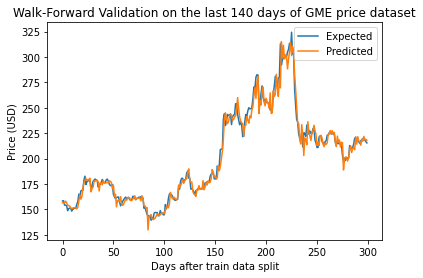

In [ ]:
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.title('Walk-Forward Validation on the last 140 days of GME price dataset')
pyplot.xlabel('Days after train data split')
pyplot.ylabel('Price (USD)')
pyplot.show()

Using this fit on new stocks

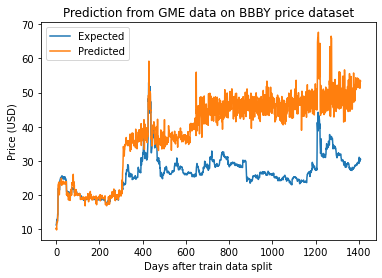

In [ ]:
#Test on new data

stocktest = 'BBBY'
combined_dftest = daily_mean_Posts.join(prices[stocktest]).reset_index()
combined_dftest.rename(columns={'index': 'created_utc'}, inplace=True)

#Convert time to float
combined_dftest['created_utc'] = combined_dftest['created_utc'].apply(lambda x: x.timestamp())



data = series_to_supervised(combined_dftest, n_in=1)
data = asarray(data)
# split into input and output columns
testX, testy = data[:, :-1], data[:, -1]
newpredy = model.predict(testX)

# plot expected vs preducted
pyplot.plot(testy, label='Expected')
pyplot.plot(newpredy, label='Predicted')
pyplot.legend()
pyplot.title('Prediction from GME data on BBBY price dataset')
pyplot.xlabel('Days after train data split')
pyplot.ylabel('Price (USD)')
pyplot.show()



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

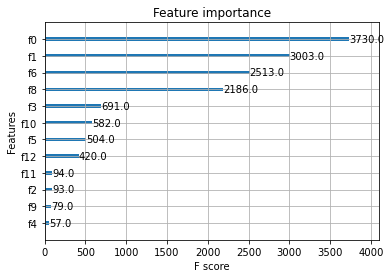

In [ ]:
import xgboost as xgb

xgb.plot_importance(model)

In [ ]:
#Create dataframes for each stock

#uses the combined
dfpredictions = DataFrame()
dfexpected = DataFrame()
for column_name in prices.columns:
    combined_df = daily_mean_Posts.join(prices[column_name]).reset_index()
    combined_df.rename(columns={'index': 'created_utc'}, inplace=True)
#Convert time to float
    combined_df['created_utc'] = combined_df['created_utc'].apply(lambda x: x.timestamp())
    data = series_to_supervised(combined_df, n_in=1)
    data = asarray(data)
# split into input and output columns
    testX, testy = data[:, :-1], pd.DataFrame(data[:, -1])
    newpredy = pd.DataFrame(model.predict(testX))
    prediction_new_column_name = f'{column_name}_Prediction'
    expected_new_column_name = f'{column_name}_Expected'
    newpredy.columns = [prediction_new_column_name]   
    testy.columns = [expected_new_column_name] 
    print(f"Processing column: {column_name}")
    print("Length of newpredy:", len(newpredy))
    print("Length of testy:", len(testy))   
    dfpredictions = pd.concat([dfpredictions, newpredy], ignore_index= True, axis =1 )
    dfexpected = pd.concat([dfexpected, testy], ignore_index= True, axis =1 )

dfpredictions.reset_index(drop=True, inplace=True)
dfexpected.reset_index(drop=True, inplace=True)
dfpredictions

#.insert instead?


Processing column: AAPL
Length of newpredy: 86
Length of testy: 86
Processing column: AMC
Length of newpredy: 57
Length of testy: 57
Processing column: BBBY
Length of newpredy: 69
Length of testy: 69
Processing column: FIZZ
Length of newpredy: 59
Length of testy: 59
Processing column: GME
Length of newpredy: 57
Length of testy: 57
Processing column: LGND
Length of newpredy: 57
Length of testy: 57
Processing column: NOKIA
Length of newpredy: 11
Length of testy: 11
Processing column: VIAC
Length of newpredy: 85
Length of testy: 85


,0,1,2,3,4,5,6,7
0,157.881805,22.960415,36.995071,50.212151,40.803013,157.881805,33.552704,45.440834
1,149.166290,25.530777,36.276855,55.947571,83.731598,153.770569,29.369938,50.956867
2,150.453445,28.427011,36.336155,86.559967,281.090240,165.788849,33.843201,44.070232
3,152.757141,28.271208,48.456692,85.320053,277.836304,178.131226,32.790550,52.985760
4,151.517303,25.460091,44.756721,70.415276,240.577911,156.621094,32.520317,53.061249
...,...,...,...,...,...,...,...,...
81,153.635437,NaN,NaN,NaN,NaN,NaN,NaN,62.671127
82,153.047592,NaN,NaN,NaN,NaN,NaN,NaN,73.253281
83,150.041336,NaN,NaN,NaN,NaN,NaN,NaN,70.355896
84,150.746323,NaN,NaN,NaN,NaN,NaN,NaN,65.113533


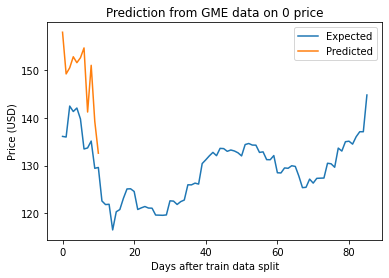

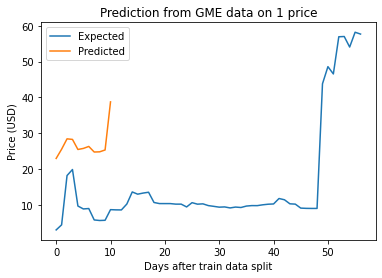

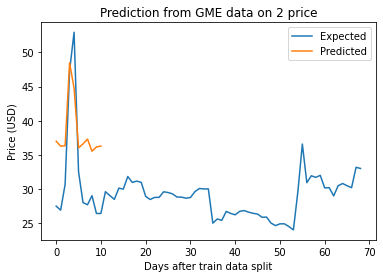

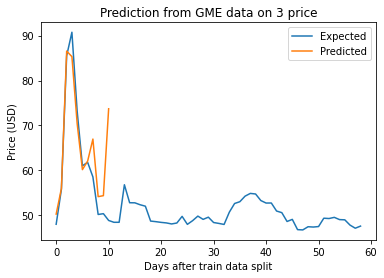

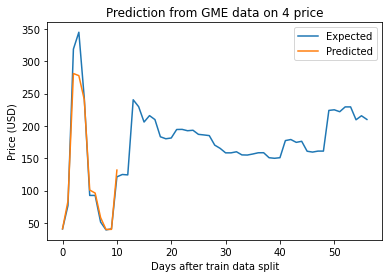

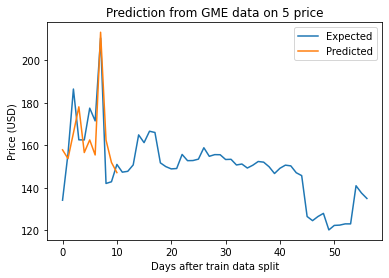

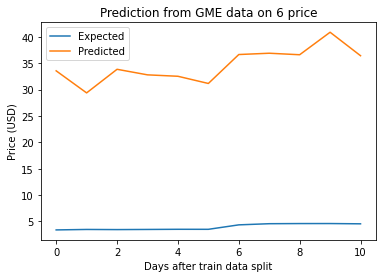

ValueError: Found input variables with inconsistent numbers of samples: [86, 11]

In [ ]:
# plot expected vs predicted
from sklearn.metrics import r2_score

nodateprices = prices_post_join.reset_index(drop = True)
for i in range(0,7):
    pyplot.plot(dfexpected.iloc[:,i], label='Expected')
    pyplot.plot(dfpredictions.iloc[:,i], label='Predicted')
    pyplot.legend()
    pyplot.title(f"Prediction from GME data on {dfpredictions.columns[i]} price")
    pyplot.xlabel('Days after train data split')
    pyplot.ylabel('Price (USD)')
    pyplot.show()

for i in range(0,7):
    print(f"Prediction from GME data on {dfpredictions.columns[i]} price {r2_score(dfexpected.iloc[:,i], dfpredictions.iloc[:,i])}")

#R2 score validation
# r2_score(dfexpected.iloc[:,4].dropna(), dfpredictions.iloc[:,4].dropna())
# dfexpected.iloc[:,0].dropna() 
# dfpredictions.iloc[:,0].dropna()
